In [25]:
import numpy as numpy
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")
path = "./ENB2012_data.xlsx" 
df = pd.read_excel(path)
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [24]:
df.columns = [
    "Relative_Compactness",
    "Surface_Area",
    "Wall_Area",
    "Roof_Area",
    "Overall_Height",
    "Orientation",
    "Glazing_Area",
    "Glazing_Area_Distribution",
    "Heating_Load",
    "Cooling_Load",
]
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


/Users/ahnwooseok/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ahnwooseok/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ahnwooseok/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ahnwooseok/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ahnwooseok/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missin

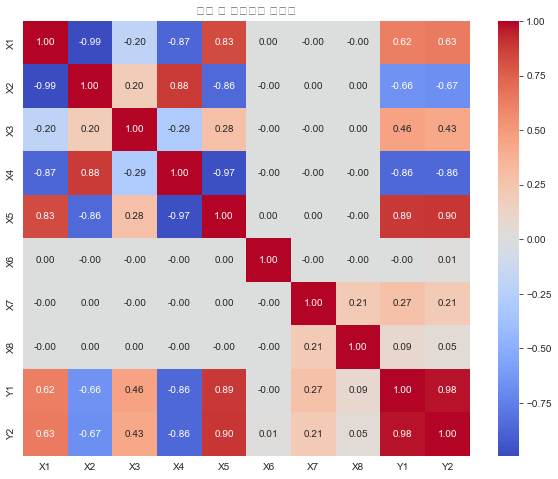

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("변수 간 상관관계 히트맵")
plt.show()

EDA 분석 결과
1. 건물 특성(X 변수)과 에너지 효율성(Y 변수) 간의 상관관계
	•	**상대적 집약도(X1)**와 **표면적(X2)**는 서로 강한 음(-)의 상관관계(-0.99)가 있고, 난방/냉방 부하(Y1/Y2) 모두와 -0.62, -0.63 정도의 음의 상관관계를 보입니다.
	•	상대적 집약도가 높을수록(즉, 건물이 더 집약적일수록) 난방·냉방 부하가 낮아지는 경향을 확인할 수 있습니다.
	•	**표면적(X2)**는 난방/냉방 부하와 강한 양의 상관관계(+0.66, +0.67)가 있습니다.
	•	표면적이 클수록 에너지원의 사용(부하)이 커진다고 해석할 수 있습니다.
	•	전체 높이(X5) 또한 난방/냉방 부하에 대해 강한 양의 상관관계(+0.89, +0.89)를 보입니다.
	•	건물의 전체 높이가 높을수록 에너지 부하가 증가하는 경향을 보입니다.
	•	**지붕 면적(X4)**은 난방/냉방 부하 모두 강한 음의 상관관계(-0.86)입니다.
	•	유리창 면적(X7), 유리창 분포(X8), 벽면적(X3) 등은 상대적으로 약한 상관관계를 보입니다(대략 +0.21 이하).
2. 변수 간 상관계수 해석
	•	난방 부하(Y1), 냉방 부하(Y2)는 0.98의 매우 높은 양의 상관관계를 보이며, 열과 냉방에 사용되는 에너지 효율성이 구조적으로 크게 연동됨을 의미합니다.
	•	표면적(X2), 전체 높이(X5), 상대적 집약도(X1), 지붕 면적(X4)의 영향력이 특히 큼을 확인할 수 있습니다.
3. 결론 및 인사이트
	•	건물 설계 시 **상대적 집약도(Compactness)**를 높이고 표면적과 전체 높이를 최적화하면 에너지 효율을 높여 난방/냉방 부하를 줄일 수 있습니다.
	•	표면적, 전체 높이, 지붕 면적 등은 난방/냉방 부하와 모두 높은 절댓값의 상관계수를 갖기에, 실질적 설계·개선에서 우선적으로 고려할 만한 핵심 특성입니다.
요약:
실제 에너지 효율(난방/냉방 부하)은 설계 특성 중 표면적, 전체 높이, 상대적 집약도, 지붕 면적에 의해 주요하게 결정되며, 이 특성들의 최적화가 에너지 절감에 중요한 역할을 할 수 있음을 EDA 기반으로 확인할 수 있습니다.


EDA 통한 유효 변수 선정 
EDA에서 Heating_Load, Cooling_Load에 영향이 큰 변수
	•	Relative_Compactness
	•	Surface_Area
	•	Roof_Area
	•	Overall_Height

In [31]:
# 주요 변수 및 타깃 변수 지정
features = ['X1', 'X2', 'X4', 'X5']  # EDA 결과 영향 높은 변수들로 선택 (X3 등도 필요시 추가)
X = df[features]
y1 = df['Y1']  # 난방 부하
y2 = df['Y2']  # 냉방 부하

# 데이터 분할 및 모델링 (Separate Models)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=0.3, random_state=42
)

# 난방 부하 모델
model_y1 = LinearRegression().fit(X_train, y1_train)
y1_pred = model_y1.predict(X_test)

# 냉방 부하 모델
model_y2 = LinearRegression().fit(X_train, y2_train)
y2_pred = model_y2.predict(X_test)

# 평가 함수
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

r2_y1, rmse_y1 = evaluate(y1_test, y1_pred)
r2_y2, rmse_y2 = evaluate(y2_test, y2_pred)

print(f'Heating Load 모델 - R²: {r2_y1:.3f}, RMSE: {rmse_y1:.3f}')
print(f'Cooling Load 모델 - R²: {r2_y2:.3f}, RMSE: {rmse_y2:.3f}')


Heating Load 모델 - R²: 0.841, RMSE: 4.017
Cooling Load 모델 - R²: 0.839, RMSE: 3.809


# 다중 출력(Multi-Output) 문제에 대한 예측 모델 접근 방법

에너지 효율성 데이터셋과 같이 예측해야 할 목표 변수가 두 개 이상인 경우, 이를 다중 출력 문제로 볼 수 있습니다. 본 사례에서는 난방 부하(Y1)와 냉방 부하(Y2)를 함께 예측하는 상황을 다룹니다. 다중 출력 예측을 수행하는 대표적인 두 가지 접근 방법에 대해 정리하였습니다.

---

## 1. Separate Models (독립 모델 접근)

- **정의:**  
  각 목표 변수(Y1, Y2)를 독립적으로 분리하여 각각의 모델을 별도로 개발하는 방식입니다.

- **장점:**  
  - 각 목표변수에 최적화된 모델을 만들 수 있어 변수별 특성에 맞춘 맞춤형 예측이 가능합니다.
  - 모델 단순성 유지 및 구현이 상대적으로 쉽습니다.
  - 예측 결과 해석이 직관적이며, 변수별 중요도 분석이 용이합니다.

- **단점:**  
  - Y1과 Y2 사이의 상관관계나 의존성이 모델에 반영되지 않아 두 목표 변수 간의 내재된 관계를 활용하지 못합니다.
  - 결과적으로 독립 예측으로 인해 상호 영향이 고려되지 않는 한계가 있습니다.

---

## 2. Chained Predictions (연쇄적 예측)

- **정의:**  
  먼저 한 목표변수(Y1)를 예측하고, 그 예측 결과를 추가 입력 변수로 활용하여 두 번째 목표변수(Y2)를 예측하는 방식입니다. (반대 순서도 가능)

- **장점:**  
  - 목표변수 간 의존성을 자연스럽게 반영할 수 있어 예측 정확도를 개선할 가능성이 있습니다.
  - 첫 번째 모델의 예측이 두 번째 모델의 입력으로 작용해 상호 관계를 효과적으로 활용합니다.

- **단점:**  
  - 첫 번째 단계 예측에 발생한 오류가 두 번째 모델 예측에도 전파되어 성능 저하를 일으킬 수 있습니다.
  - 모델 설계와 학습 과정이 복잡해지고, 예측 과정이 단계적으로 이루어져 계산 비용이 증가할 수 있습니다.

---

## 결론

- **Separate Models** 방식은 단순하고 개별 변수에 특화된 모델링에 적합하며 빠른 프로토타이핑과 해석에 유리합니다.  
- 반면, **Chained Predictions** 방식은 목표변수 간의 관계를 활용하여 더욱 정교한 예측이 가능하지만, 오류 누적 위험과 모델 복잡성 비용을 감수해야 합니다.

실제 적용 시에는 데이터 특성과 예측 목적에 따라 두 방식을 적절히 선택하거나, 두 방식을 비교 평가하여 최적의 모델링 전략을 수립하는 것이 바람직합니다.